### Drawing a network diagram of the _C. elegans_ connectome (Witvliet et al., _Nature_ 2021).
---
*Last updated: 21 July 2023*

In [ ]:
# imports
import os
import torch

from utils import ROOT_DIR
from torch_geometric.data import Data
from visualize._utils import draw_connectome

In [ ]:
# load the raw data
graph_tensors = torch.load(
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "graph_tensors.pt")
)

# make the graph
graph = Data(**graph_tensors)

# investigate the graph
print(
    "Attributes:",
    "\n",
    graph.keys,
    "\n",
    f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
    f"Num. node features {graph.num_node_features}",
    end="\n",
)
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}")


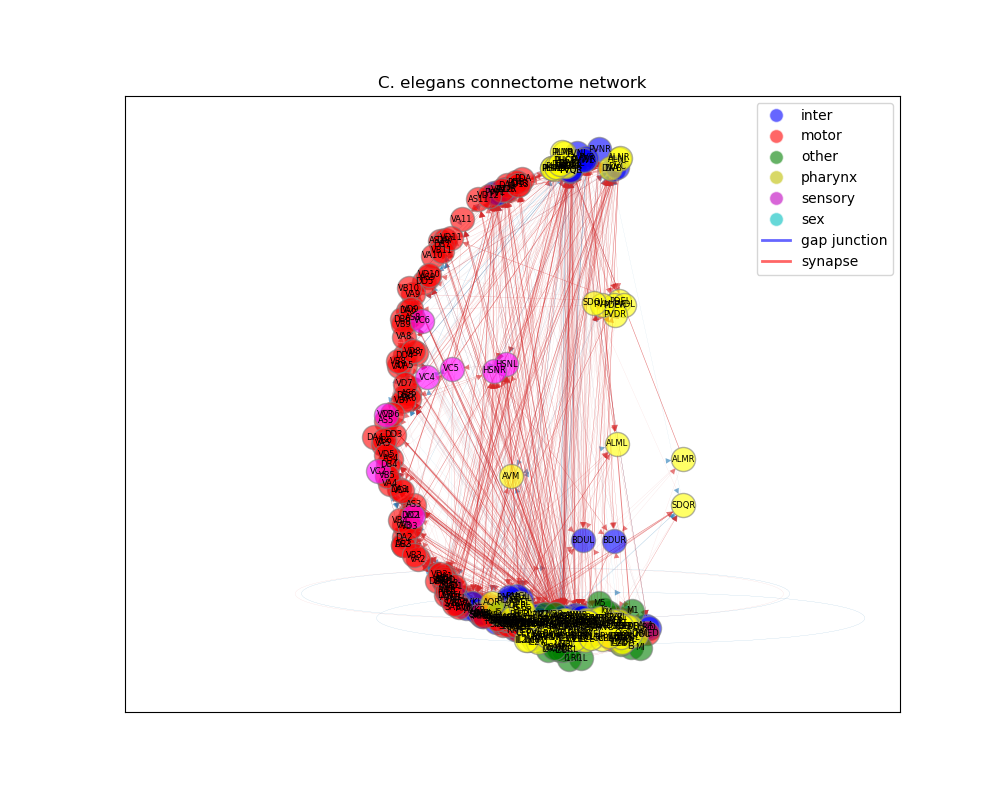

In [3]:
# enable interactive plotting in Jupyter
%matplotlib widget

# draw the connectome
draw_connectome(graph, plot_3d=False)
